In [1]:
import pandas as pd
import numpy as np

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_submit = pd.read_csv('gender_submission.csv')

df_all = pd.concat([df_train, df_test], axis=0)
# print(df_all.shape)
# print(df_test.shape)
# print(df_train.shape)
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [2]:
name_df = df_train['Name'].str.split(pat='[,.]', n=2, expand = True)
name_df.columns = ['family_name', 'honorific', 'name']
for column in name_df.columns:
    name_df[column] = name_df[column].str.strip()

df_train = pd.concat([df_train, name_df['honorific']], axis=1)
df_train = df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Rev
887,1,1,female,19.0,0,0,30.0000,S,Miss
888,0,3,female,NaN,1,2,23.4500,S,Miss
889,1,1,male,26.0,0,0,30.0000,C,Mr


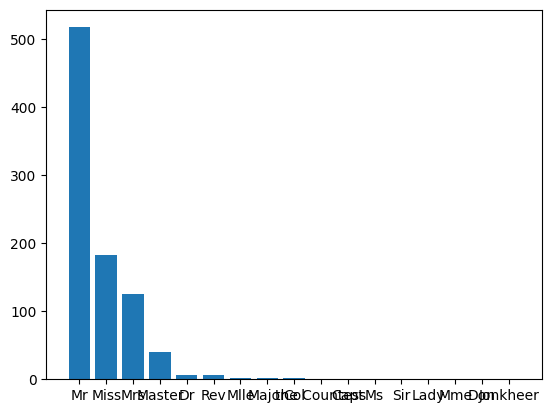

array([517, 182, 125,  40,   7,   6,   2,   2,   2,   1,   1,   1,   1,
         1,   1,   1,   1])

In [3]:
import matplotlib.pyplot as plt
honorifics = df_train['honorific'].value_counts()
plt.bar(honorifics.index, honorifics.values)
plt.show()
honorifics.values

In [4]:
def honorifics_classify(df_honorific):
    honorific_list = ['Mr', 'Miss', 'Mrs' ,'Master']
    return df_honorific if df_honorific in honorific_list else 'else'
    
df_train['honorific'] = df_train['honorific'].apply(honorifics_classify)
df_train['honorific'].value_counts().values

array([517, 182, 125,  40,  27])

In [5]:
df_train = df_train.drop(['Age'], axis=1)
print(df_train.isnull().sum())
print(df_train.shape)

Survived     0
Pclass       0
Sex          0
SibSp        0
Parch        0
Fare         0
Embarked     2
honorific    0
dtype: int64
(891, 8)


In [6]:
df_train = df_train.dropna(subset=['Embarked'])
print(df_train.isnull().sum())
print(df_train.shape)

Survived     0
Pclass       0
Sex          0
SibSp        0
Parch        0
Fare         0
Embarked     0
honorific    0
dtype: int64
(889, 8)


In [7]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe_targetlists = ['Sex', 'Embarked', 'honorific']


ohe_arr = ohe.fit_transform(df_train[ohe_targetlists]).toarray()
ohe_arr_feature_names = ohe.get_feature_names_out(ohe_targetlists)
# concat은 인덱스가 맞지 않으면 행이 추가되는 오류가 생긴다.
# 원-핫 인코딩한 배열을 data frame으로 만들때, 그럼으로 반드시 index=원본df.index 를 통해서 인덱스를 통일시켜야한다.
ohe_arr_df = pd.DataFrame(ohe_arr, columns=ohe_arr_feature_names, index=df_train.index)
df_train = pd.concat([df_train, ohe_arr_df], axis=1)
df_train = df_train.drop(ohe_targetlists, axis=1)
df_train

,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,honorific_Master,honorific_Miss,honorific_Mr,honorific_Mrs,honorific_else
0,0,3,1,0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,1,1,0,71.2833,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,3,0,0,7.9250,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1,1,1,0,53.1000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,3,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
887,1,1,0,0,30.0000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
888,0,3,1,2,23.4500,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
889,1,1,0,0,30.0000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [8]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

df.test 또한 같은 전처리 과정을 거쳐야한다. 결측값을 보니 Age는 특징으로 사용할수 없을거같다.

1. 'Name'행에서 명칭만 추출해낸 후, 'Mr', 'Miss', 'Mrs' ,'Master'외에는 else로 인코딩한다.
2.  결측치 df_train 평균값으로 채우고 나머지값 원 핫 인콬딩
3. ['PassengerId','Age','Name', 'Ticket', 'Cabin', 'Sex', 'Embarked', 'honorific']가 최종적으로 제거되고 모든 비 실수형 데이터 인코딩돼야함

In [9]:
df_test['Fare'] = df_test['Fare'].fillna(df_train['Fare'].mean())
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [10]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [11]:
name_df = df_test['Name'].str.split(pat='[,.]', n=2, expand = True)
name_df.columns = ['family_name', 'honorific', 'name']
for column in name_df.columns:
    name_df[column] = name_df[column].str.strip()
df_test = pd.concat([df_test, name_df['honorific']], axis=1)
df_test['honorific'] = df_test['honorific'].apply(honorifics_classify)
df_test['honorific'].value_counts().values
df_test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,honorific
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,else
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


In [12]:
drop_list = ['PassengerId','Age','Name', 'Ticket', 'Cabin', 'Sex', 'Embarked', 'honorific']

ohe_arr = ohe.fit_transform(df_test[ohe_targetlists]).toarray()
ohe_arr_feature_names = ohe.get_feature_names_out(ohe_targetlists)
ohe_arr_df = pd.DataFrame(ohe_arr, columns=ohe_arr_feature_names, index=df_test.index)
df_test = pd.concat([df_test, ohe_arr_df], axis=1)
df_test = df_test.drop(drop_list, axis=1)
df_test

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,honorific_Master,honorific_Miss,honorific_Mr,honorific_Mrs,honorific_else
0,3,0,0,7.8292,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,1,0,7.0000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,0,0,9.6875,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,0,0,8.6625,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,3,1,1,12.2875,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
414,1,0,0,108.9000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
415,3,0,0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
416,3,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [13]:
y_train = df_train['Survived']
X_train = df_train.drop('Survived', axis=1)

In [14]:
X_test = df_test
print(X_train.shape)
print(X_test.shape)

(889, 14)
(418, 14)


이제 준비가 다됐다. 난 4개를 앙상블 학습을 통해서 비교해볼것이다.
- 모델 목록
1. 로지스틱 회귀
2. SVM
3. SVM_커널
4. 결정트리

# 데이터의 구조가 선형인지, 비선형인지 판단이 어렵다.
# 차원 축소를 할려고할때 판단의 과정이 힘들다.
# 일단 머신 러닝을 하고, 추후 판단이 교차검증등을 통해서 판단하는것이 나을듯하다.

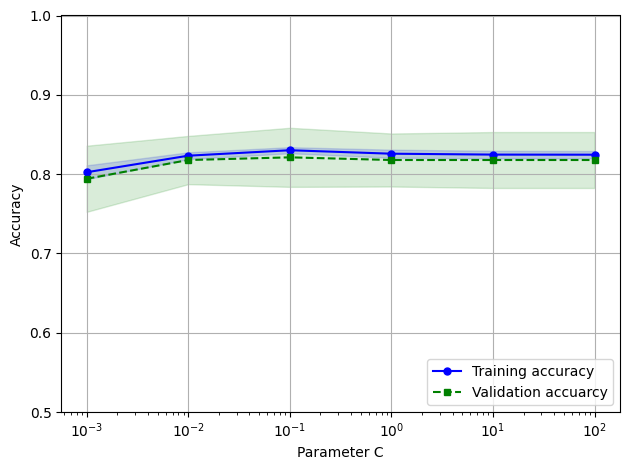

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2',random_state=1))

param_range = [0.001, 0.01, 0.1 , 1.0 , 10.0, 100.0]
train_scores, test_scores = validation_curve(
    estimator= pipe_lr,
    X=X_train,
    y=y_train,
    param_name='logisticregression__C',
    param_range=param_range,
    cv=10
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# 시각화 부분 코드
import matplotlib.pyplot as plt

# 훈련데이터셋 정확도
plt.plot(param_range, train_mean, color = 'blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')

# 검증데이터셋 정확도
plt.plot(param_range, test_mean, color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuarcy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.tight_layout()
plt.show()

규제가 C = 10^-1에서 최적의 성능을 보여준다.
이걸 이용해서 훈련 시키고 이를 저장해놓자

In [17]:
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', C=0.1 ,random_state=1))
lr = pipe_lr.fit(X_train, y_train)


<bound method Pipeline.score of Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.1, random_state=1))])>


In [282]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# param_name에 접근하는 방법표시는 '__'이다. 이 룰을 기억하자.
pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1 , 1.0 , 10.0, 100.0, 1000.0]
param_grid = [{'svc__C' : param_range,
               'svc__kernel' : ['linear']},
               {'svc__C' : param_range,
               'svc__gamma' : param_range,
               'svc__kernel' : ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  refit=True,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.8313074565883556
{'svc__C': 100.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


In [283]:
# probability=True 옵션을 추가하지 않아서, 점수 확인을 못할뻔했따.. 이건 앞으로 그냥 항상 넣도록 하자
pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1, probability=True, C=100.0, gamma=0.01, kernel='rbf'))
svc = pipe_svc.fit(X_train, y_train)

In [284]:
from sklearn.tree import DecisionTreeClassifier

# 파이프라인 생성
pipe_dt = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# 하이퍼파라미터 범위 설정
param_grid = {
    'decisiontreeclassifier__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'decisiontreeclassifier__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

# 그리드 서치 설정
gs_dt = GridSearchCV(estimator=pipe_dt, param_grid=param_grid, scoring='accuracy', cv=10, refit=True, n_jobs=-1)

# 그리드 서치 수행
gs_dt.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print("Best Decision Tree score:", gs_dt.best_score_)
print("Best Decision Tree parameters:", gs_dt.best_params_)


Best Decision Tree score: 0.8324310520939735
Best Decision Tree parameters: {'decisiontreeclassifier__max_depth': 4, 'decisiontreeclassifier__min_samples_split': 2}


In [285]:
pipe_dt = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1, max_depth=4, min_samples_split=2))

In [286]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# 파이프라인 생성
pipe_knn = make_pipeline(StandardScaler(), KNeighborsClassifier())

# 하이퍼파라미터 범위 설정
param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__algorithm': ['ball_tree', 'kd_tree', 'brute']
}

# 그리드 서치 설정
gs_knn = GridSearchCV(estimator=pipe_knn, param_grid=param_grid, scoring='accuracy', cv=10, refit=True, n_jobs=-1)

# 그리드 서치 수행
gs_knn.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print("Best KNN score:", gs_knn.best_score_)
print("Best KNN parameters:", gs_knn.best_params_)


Best KNN score: 0.8313202247191012
Best KNN parameters: {'kneighborsclassifier__algorithm': 'kd_tree', 'kneighborsclassifier__n_neighbors': 11, 'kneighborsclassifier__weights': 'uniform'}


In [287]:
pipe_knn = make_pipeline(StandardScaler(), KNeighborsClassifier(algorithm='kd_tree', n_neighbors=11, weights='uniform'))



pipe_svc, svc 서포트 벡터머신
    pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1,probability=True, C=100.0, gamma=0.01, kernel='rbf'))
    svc = pipe_svc.fit(X_train, y_train)
pipe_lr, lr 로지스틱 회귀
    pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', C=0.1 ,random_state=1))
    lr = pipe_lr.fit(X_train, y_train)
pipe_dt : 결정트리 
    pipe_dt = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1, max_depth=4, min_samples_split=2))
pipe_knn : knn최근접 이웃
    pipe_knn = make_pipeline(StandardScaler(), KNeighborsClassifier(algorithm='kd_tree', n_neighbors=11, weights='uniform'))

위 4개를 비교해보자!

In [288]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[
    ('lr', pipe_lr), ('df', pipe_dt), ('svc', pipe_svc), ('knn', pipe_knn)],
    voting='soft')

In [290]:
vc.fit(X_train, y_train)
train_score = vc.score(X_train, y_train)
print('Training Accuracy:', train_score)

Training Accuracy: 0.8537682789651294


In [293]:
y_pred = vc.predict(X_test)
df_submit['Survived'] = y_pred
df_submit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [295]:
df_submit.to_csv("/Users/yujin/Desktop/python_projects/kaggle/titanic_2/vc_submit.csv", index=False)